Reacciones en serie 

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import gmean
import pandas as pd

# datos experimentales

t = np.array([0, 120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200, 1320, 1440 ,1560]) # s
h1 = np.array([26,23,20.2,17.8,15.6,13.5,11.4,10.1,8.5,7.2,5.8,4.7,3.7,2.8]) # cm
h2 = np.array([1.1,4.3,7,9.5,11.7,13.3,13.7,13.9,13.8,13.8,13.7,13.3,12.8,12.4]) # cm
temp = 22 # °C
# capilares

lc1 =6 # cm
lc2 = 10 # cm

# calculos
c1_valor = [1]
c2_valor = [1]
for i in range(1,len(t)):
    c1 = (h1[i]+lc1)/(h1[0]+lc1)
    c2 = (h2[i]+lc2)/(h1[0]+lc1)
    c1_valor.append(c1)
    c2_valor.append(c2)
lnc1 = np.log(c1_valor)
k1 = np.zeros(len(t))
k1[1:] = -lnc1[1:] / t[1:]
k1media = gmean(k1[1:-1])
k2 = np.zeros(len(t))
k2[1:] = k1[1:] * (np.array(c1_valor[1:]) / np.array(c2_valor[1:]))
k2media = gmean(k2[1:-1])

# calculo viscosidad 
v = 1.19e-4-5.90e-6*temp+8.81e-8*temp**2

vc = np.zeros(len(t)-1)
for i in range(len(t)-1):
    vc[i] = (h1[i]-h1[i+1])/100/(t[i+1]-t[i])
    v = np.append(v,vc[i])
vc = np.append(vc, np.nan)
re = 0.03*vc/v
df = pd.DataFrame({
    't ,s': t,
    'h1 ,n': h1,
    'h2 ,m': h2,
    'c1': c1_valor,
    'c2': c2_valor,
    'k1 , s^-1': k1,
    'k2 , s^-1': k2,
    'v , m^2/s': vc,
    'Re': re
})
pd.set_option('display.colheader_justify', 'center')
display(df)

df_resultados = pd.DataFrame({
    'k1 , s^-1': [f"{k1media:.2e}"],
    'k2 , s^-1': [f"{k2media:.2e}"],
    'v , m^2/s': [f"{v[0]:.2e}"],
    'lc1 , m': [lc1/100],
    'lc2 , m': [lc2/100]
})

display(df_resultados)

,"t ,s","h1 ,n","h2 ,m",c1,c2,"k1 , s^-1","k2 , s^-1","v , m^2/s",Re
0,0,26.0,1.1,1.000000,1.000000,0.000000,0.000000,0.000250,0.235550
1,120,23.0,4.3,0.906250,0.446875,0.000820,0.001664,0.000233,0.028000
2,240,20.2,7.0,0.818750,0.531250,0.000833,0.001284,0.000200,0.025714
3,360,17.8,9.5,0.743750,0.609375,0.000822,0.001004,0.000183,0.027500
4,480,15.6,11.7,0.675000,0.678125,0.000819,0.000815,0.000175,0.028636
5,600,13.5,13.3,0.609375,0.728125,0.000826,0.000691,0.000175,0.030000
6,720,11.4,13.7,0.543750,0.740625,0.000846,0.000621,0.000108,0.018571
7,840,10.1,13.9,0.503125,0.746875,0.000818,0.000551,0.000133,0.036923
8,960,8.5,13.8,0.453125,0.743750,0.000825,0.000502,0.000108,0.024375
9,1080,7.2,13.8,0.412500,0.743750,0.000820,0.000455,0.000117,0.032308


,"k1 , s^-1","k2 , s^-1","v , m^2/s","lc1 , m","lc2 , m"
0,8.27e-04,6.46e-04,3.18e-05,0.06,0.1


Reaccion en paralelo

,"t ,s","hm , cm","V1 , cm³","V2 , cm³","h , cm",k1+k2,V1/V2,ln(h)
0,0,27.0,10.0,0.000000,52.0,0.000000,NaN,3.951244
1,5,25.4,23.0,7.106193,50.4,0.006251,1.829390,3.919991
2,10,24.0,35.3,12.399112,49.0,0.005942,2.040469,3.891820
3,15,22.6,47.5,17.792031,47.6,0.005894,2.107685,3.862833
4,20,21.0,59.3,26.098224,46.0,0.006130,1.889017,3.828641
5,25,19.9,70.7,28.521231,44.9,0.005872,2.128239,3.804438
6,30,18.3,81.8,37.527424,43.3,0.006103,1.913267,3.768153
7,35,17.2,92.4,40.750432,42.2,0.005966,2.022064,3.742420
8,40,16.0,103.3,44.930077,41.0,0.005942,2.076560,3.713572


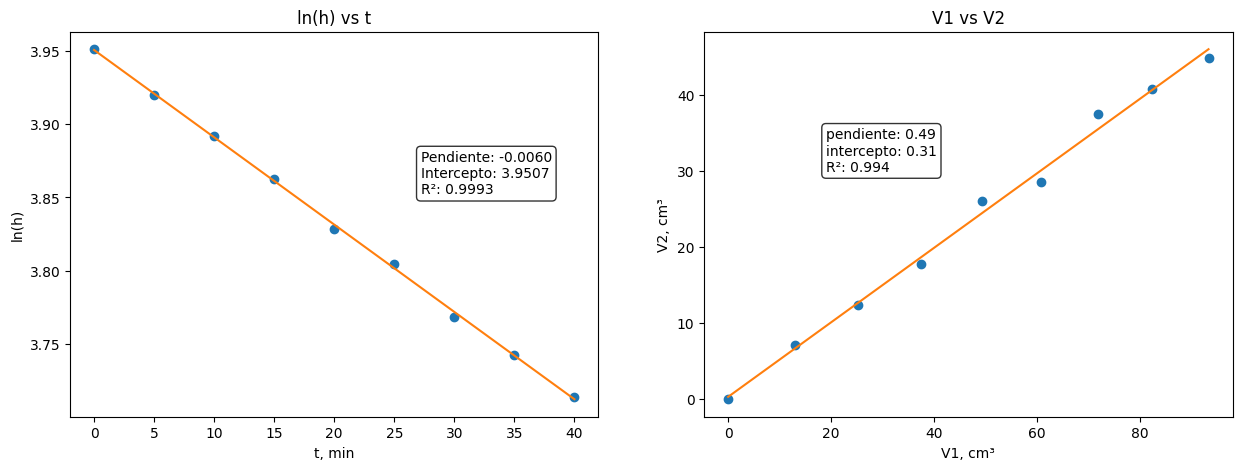

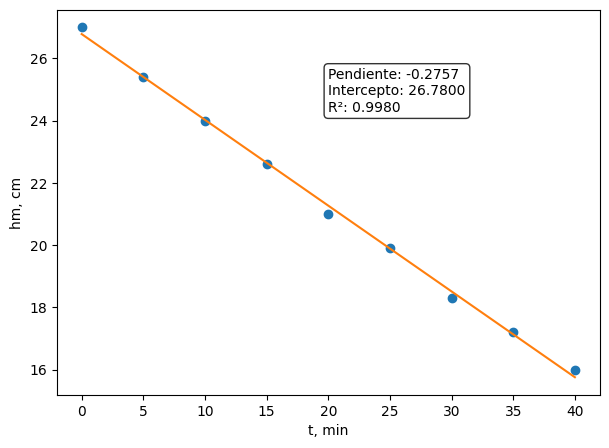

,"k1k2 , s^-1",V1/V2,k1k2 grafica,k1 real,k2 real
0,6.01e-03,1.998,-0.0060,-3.97e-03,-1.99e-03


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import gmean
import pandas as pd
from scipy.stats import linregress
# datos experimentales


t = np.array([0, 5,10,15,20,25,30,35,40])
hm = np.array([27,25.4,24.0,22.6,21.0,19.9,18.3,17.2,16.0]) # cm
temp = 22 # °C
v1m = np.array([10.0,23.0,35.3,47.5,59.3,70.7,81.8,92.4,103.3]) # cm³

lt =25 # cm
D = 4 # cm
h = hm+lt
V1 = [v1m[i] - v1m[0] for i in range(len(v1m))]

s = (np.pi*(D/100)**2)/4 # m²
s2 = s*1e4 # cm²
V2 = [(hm[0] - hm[i]) * s2 - V1[i] for i in range(len(v1m))]
k1 = np.zeros(len(t))
k1[1:] = (np.log(h[0])-np.log(h[1:])) / t[1:]
v1v2 = np.zeros(len(t))
v1v2[0] = np.nan
v1v2[1:] = np.array(V1[1:]) / np.array(V2[1:])
kmedia = gmean(k1[1:])
v1v2media = gmean(v1v2[1:])
lnh = np.log(h)
df = pd.DataFrame({
    't ,s': t,
    'hm , cm': hm,
    'V1 , cm³': v1m,
    'V2 , cm³': V2,
    'h , cm': h,
    'k1+k2': k1,
    'V1/V2': v1v2,
    'ln(h)': lnh
})
pd.set_option('display.colheader_justify', 'center')
display(df)

# graficos
slope, intercept, r_value, p_value, std_err = linregress(t, lnh)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(V1, V2)
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(t, hm)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('ln(h) vs t')
plt.plot(t, lnh, 'o')
plt.plot(t, slope*np.array(t)+intercept)
plt.xlabel('t, min')
plt.ylabel('ln(h)')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.68 * max(t), max(lnh) * 0.975, f"Pendiente: {slope:.4f}\nIntercepto: {intercept:.4f}\nR²: {r_value**2:.4f}",fontsize=10, bbox=props)

plt.subplot(1,2,2)
plt.title('V1 vs V2')
plt.plot(V1, V2, 'o')
plt.plot(V1, slope2*np.array(V1)+intercept2)
plt.xlabel('V1, cm³')
plt.ylabel('V2, cm³')
plt.text(19, 30,f"pendiente: {slope2:.2f}\nintercepto: {intercept2:.2f}\nR²: {r_value2**2:.3f}", fontsize=10, bbox=props)
plt.show()
plt.figure(figsize=(7,5))
plt.plot(t,hm,'o')
plt.plot(t, slope3*np.array(t)+intercept3)
plt.xlabel('t, min')
plt.ylabel('hm, cm')
plt.text(0.5*max(t),0.9* max(hm), f"Pendiente: {slope3:.4f}\nIntercepto: {intercept3:.4f}\nR²: {r_value3**2:.4f}",fontsize=10, bbox=props)
plt.show()
k1_real = (slope*v1v2media)/(1+v1v2media)
k2_real = slope - k1_real   
df_resultados = pd.DataFrame({
    'k1k2 , s^-1': [f"{kmedia:.2e}"],
    'V1/V2': [f"{v1v2media:.3f}"],
    'k1k2 grafica': [f"{slope:.4f}"],
    'k1 real': [f"{k1_real:.2e}"],
    'k2 real': [f"{k2_real:.2e}"]
})
display(df_resultados)

Reacciones irreversibles

,"t ,s","h1 ,n","h2 ,m","V1 , m³","V2 , m³","Vt1 , m³",y1,ß1
0,0,0.240,0.033,0.000170,0.000039,0.000209,0.000000,0.175012
1,4,0.191,0.063,0.000135,0.000075,0.000210,0.298933,0.176018
2,8,0.159,0.082,0.000112,0.000098,0.000210,0.618029,0.176083
3,12,0.141,0.091,0.000100,0.000109,0.000208,0.894314,0.174432
4,16,0.127,0.100,0.000090,0.000119,0.000209,1.279264,0.175148
5,20,0.120,0.104,0.000085,0.000124,0.000209,1.608427,0.175006
6,24,0.117,0.105,0.000083,0.000125,0.000208,1.791512,0.174231
7,28,0.115,0.107,0.000081,0.000128,0.000209,2.043773,0.175047


,"t ,s","h1 ,n","h2 ,m","V1 , m³","V2 , m³","Vt2 , m³",y2,ß2
0,0,0.261,0.015,0.000312,0.000011,0.000322,0.000000,0.45609
1,4,0.225,0.075,0.000269,0.000053,0.000322,0.185169,0.45525
2,8,0.204,0.111,0.000244,0.000078,0.000322,0.362109,0.45576
3,12,0.191,0.134,0.000228,0.000095,0.000323,0.542539,0.45679
4,16,0.182,0.148,0.000217,0.000105,0.000322,0.736447,0.45558
5,20,0.178,0.151,0.000213,0.000107,0.000319,0.827771,0.45182
6,24,0.174,0.162,0.000208,0.000115,0.000322,1.122880,0.45606
7,28,0.172,0.164,0.000205,0.000116,0.000321,1.275690,0.45468


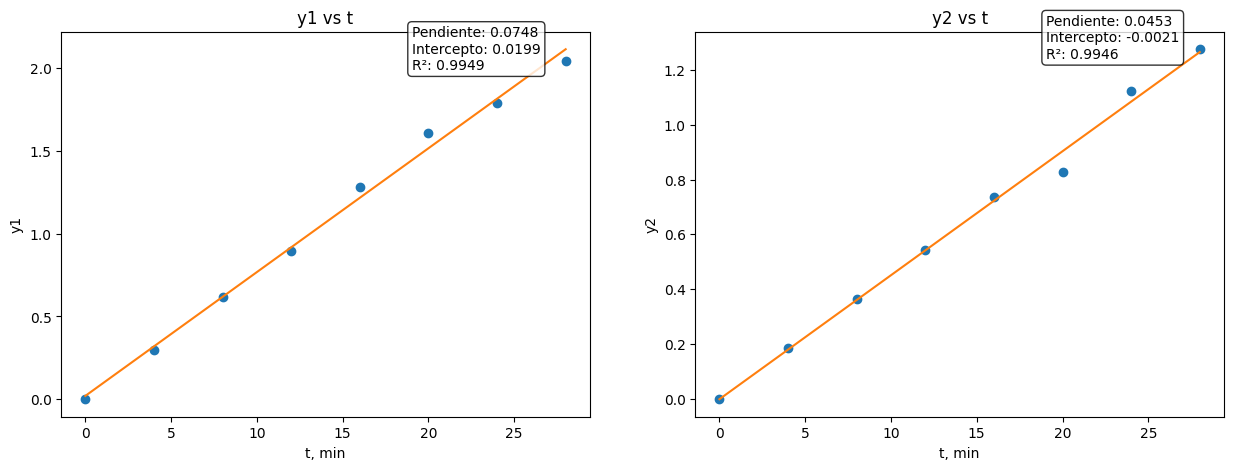

,"exp 1, k1 min^-1","exp 2, k1 min^-1",error,"exp 1, K min^-1","exp 2, k min^-1",error 2,alpha
0,0.0748,0.0453,39.47%,1.6900,1.6520,2.25%,2251.817472


In [111]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import gmean
import pandas as pd
from scipy.stats import linregress
# datos experimentales


t = np.array([0, 4,8,12,16,20,24,28])
t2 = np.array([0, 4,8,12,16,20,24,28])

h11 = np.array([24,19.1,15.9,14.1,12.7,12.0,11.7,11.5])/100 # cm exp 1
h12 = np.array([3.3,6.3,8.2,9.1,10.0,10.4,10.5,10.7])/100 # cm exp 1

h21 = np.array([26.1,22.5,20.4,19.1,18.2,17.8,17.4,17.2])/100  # cm exp 2
h22 = np.array([1.5,7.5,11.1,13.4,14.8,15.1,16.2,16.4])/100 # cm exp 2

temp = 22 # °C

D1 =3 # cm
D2 = 3.9 # cm

V11 = np.pi*(D1/100)**2/4 * h11
V12 = np.pi*(D2/100)**2/4 * h12
V21 = np.pi*(D2/100)**2/4 * h21
V22 = np.pi*(D1/100)**2/4 * h22
Vt1 = V11 + V12
Vt2 = V21 + V22
s1 = (np.pi*(D1/100)**2)/4 # m²
s2 = (np.pi*(D2/100)**2)/4 # m²

alpha1 = (1/s1)+(1/s2)

ß1 = Vt1/s2
y1 = (1/alpha1/s1)*np.log((alpha1*V11[0]-ß1)/(alpha1*V11-ß1))
ß2 = Vt2/s1
y2 = (1/alpha1/s2)*np.log((alpha1*V21[0]-ß2)/(alpha1*V21-ß2))

df1 = pd.DataFrame({
    't ,s': t,
    'h1 ,n': h11,
    'h2 ,m': h12,
    'V1 , m³': V11,
    'V2 , m³': V12,
    'Vt1 , m³': Vt1,
    'y1': y1,
    'ß1': ß1
})

df2 = pd.DataFrame({
    't ,s': t2,
    'h1 ,n': h21,
    'h2 ,m': h22,
    'V1 , m³': V21,
    'V2 , m³': V22,
    'Vt2 , m³': Vt2,
    'y2': y2,
    'ß2': ß2
})
pd.set_option('display.colheader_justify', 'center')
display(df1)
display(df2)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(t, y1)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(t2, y2)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('y1 vs t')
plt.plot(t, y1, 'o')
plt.plot(t, slope1*np.array(t)+intercept1)
plt.xlabel('t, min')
plt.ylabel('y1')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.68 * max(t), max(y1) * 0.975, f"Pendiente: {slope1:.4f}\nIntercepto: {intercept1:.4f}\nR²: {r_value1**2:.4f}",fontsize=10, bbox=props)

plt.subplot(1,2,2)
plt.title('y2 vs t')
plt.plot(t2, y2, 'o')
plt.plot(t2, slope2*np.array(t2)+intercept2)
plt.xlabel('t, min')
plt.ylabel('y2')
plt.text(0.68 * max(t2), max(y2) * 0.975, f"Pendiente: {slope2:.4f}\nIntercepto: {intercept2:.4f}\nR²: {r_value2**2:.4f}",fontsize=10, bbox=props)
plt.show()
k12 = slope1
K = s2/s1
k22 = slope2
k1 = k12/k22
df_resultados = pd.DataFrame({
    'exp 1, k1 min^-1': [f"{k12:.4f}"],
    'exp 2, k1 min^-1': [f"{k22:.4f}"],
    'error': [f"{abs(k12-k22)/max(k12,k22):.2%}"],
    'exp 1, K min^-1': [f"{K:.4f}"],
    'exp 2, k min^-1': [f"{k1:.4f}"],
    'error 2': [f"{abs(K-k1)/max(K,k1):.2%}"],
    'alpha' : [alpha1]
})
display(df_resultados)